<a href="https://colab.research.google.com/github/stacs-cp/permutation-classes-cp/blob/main/journal2023/PP_MCOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!source <(curl -s https://raw.githubusercontent.com/conjure-cp/conjure-notebook/main/installcolab.sh)
%load_ext conjure

Installing Conjure...
Conjure: The Automated Constraint Modelling Tool
Release version 2.4.0
Repository version a7382e3d9 (2022-11-21 10:41:03 +0000)


<IPython.core.display.Javascript object>

Conjure extension is loaded.
For usage help run: %conjure_help


In [ ]:
# library of helper functions

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def plotPermutation(sol):
    plt.figure(figsize=(len(sol), len(sol)), facecolor="w")
    plt.xticks(range(1, len(sol)+1))
    plt.yticks(range(1, len(sol)+1))
    plt.scatter(range(1,len(sol)+1), sol, s=100)
    plt.grid(True)

def plotPermutations(sols):
    for sol in conjure_solutions:
        plotPermutation(sol["perm"])



Note: when pushing to github, use journal2023/PP-MCOM.ipynb as the filename in the stacs-cp/permutation-classes-cp

In [ ]:
n = 4

In [ ]:
%%conjure --number-of-solutions=5

given n : int

find x : set of int(1..9)

such that |x| = n

{'conjure_solutions': [{'x': [5, 6, 8, 9]},
  {'x': [5, 6, 7, 9]},
  {'x': [6, 7, 8, 9]},
  {'x': [5, 7, 8, 9]},
  {'x': [5, 6, 7, 8]}]}

# Pattern types

We have 6 pattern types. We will write a unit test for each one.

For each pattern type, we will do avoidance and containment.

So we will have 12 models here.

The following applies to all the upcoming defintions.

We will consider a *permutation* to be an arrangement of the set $\{1, 2, \ldots , n\}$ for some $n\in\mathbb{N}$. 
The length of a permutation $\pi$ is denoted $|\pi|$, and $S_n$ is used for the set of all permutations of length $n$.
We will represent permutations in their sequence notation

Two sequences $\pi = \pi(1),\ldots,\pi(n)$ and $\sigma = \sigma(1),\ldots,\sigma(n)$ of the same length are said to be *order isomorphic* if $\forall i, j, \pi(i) \leq \pi (j)$ if and only if $\sigma(i) \leq \sigma(j)$

## Classic containment

We say that a permutation $\sigma = \sigma(1)\ldots\sigma(n)$ is *classically contained* in a permutation $\pi = \pi(1)\ldots\pi(m)$, where $n \leq m$, if there is a subsequence in $\pi$ that is order isomorphic to $\sigma$. 


For example, the permutation $\sigma=123$ can be found in $\pi=521634$ as the occurrence $134$ (amongst others).

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 3
classic_containment = [[1,2]]

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given classic_containment : set of sequence of int

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll pattern in classic_containment .
         (exists ix : matrix indexed by [int(1..|pattern|)] of int(1..length) .
            (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2])))


{'conjure_solutions': [{'perm': [1, 3, 2]},
  {'perm': [2, 1, 3]},
  {'perm': [2, 3, 1]},
  {'perm': [1, 2, 3]},
  {'perm': [3, 1, 2]}]}

## Classic avoidance

We say that a permutation $\sigma$ is not contained in a permutation $\pi$, or that $\pi$ *classically avoids* $\sigma$ if there is no subsequence in $\pi$ that is order isomorphic to $\sigma$.
For example, the permutation $\sigma=123$ is not contained in the permutation $\pi=654312$.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4
classic_avoidance = [[1,2]]

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given classic_avoidance : set of sequence of int

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll pattern in classic_avoidance .
        !(exists ix : matrix indexed by [int(1..|pattern|)] of int(1..length) .
            (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2])))


{'perm': [4, 3, 2, 1]}

## Vincular containment

Let $\sigma=\sigma(1) \ldots \sigma(n)$ and $\pi=\pi(1)\ldots \pi(m)$ and let $A \subseteq \{1,\ldots,k-1\}$. 

An occurrence of the vincular pattern $(\sigma, A)$ in $\pi$ is a subsequence $\pi(i_1)\ldots \pi(i_k)$ of length $n$ of $\pi$ such that: 
$\pi(i_1)\ldots\pi(i_n)$ is an occurrence of $\sigma$ in the classical sense, and $i_{a}=i_{a+1}$, forall $a\in A$. We call $A$ the set of *adjacencies*, we emphasise these entries in the permutation with an underline.

<!-- A vincular pattern is specified by adding bars to an underlying permutation. A bar is between two consecutive entries in the permutation. There can be multiple bars. Bars are allowed to overlap. -->

For example, the permutation $\sigma=\underline{23}1$, so the vincular pattern is $(231,\{1\})$, can be found in $\pi=513642$ as the sequence $362$, with $3$ and $6$ being adjacent to each other.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4
vincular_containment = [ [ [2,3,1]
                         , [1]
                         ]
                       ]

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given vincular_containment : set of (sequence (injective) of int, set of int)

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll (pattern, bars) in vincular_containment .
        exists ix : matrix indexed by [int(1..|pattern|)] of int(1..length)
        
            , (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            $ n1 and n2 are indices
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                (pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2]))
            )

            .

            (forAll bar in bars . ix[bar] + 1 = ix[bar+1])


{'conjure_solutions': [{'perm': [2, 4, 1, 3]},
  {'perm': [2, 3, 1, 4]},
  {'perm': [3, 4, 2, 1]},
  {'perm': [4, 2, 3, 1]},
  {'perm': [1, 3, 4, 2]},
  {'perm': [3, 4, 1, 2]},
  {'perm': [2, 4, 3, 1]},
  {'perm': [2, 3, 4, 1]},
  {'perm': [3, 2, 4, 1]}]}

In [ ]:
print(len(conjure_solutions))

9


## Vincular avoidance

We say that a permutation $\pi$ *avoids* a vincular pattern $(\sigma, A)$ if either it classically avoids $\sigma$ or for each classical occurence of $\sigma$ the entries are not adjacent.

For example, $\sigma=\underline{23}1$, $(231,\{1\})$, cannot be found in $\pi=654312$, as the permutation $231$ is not contained in $\pi$. Another example is  $\sigma=\underline{23}1$, is not contained in $\pi=631542$, even though the permutation $132$ can be found in $\pi$ as $352$, but there is an entry between $3$ and $5$ (which is $1$).


In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4
vincular_avoidance = [ [ [2,3,1]
                       , [1]
                       ]
                     ]

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given vincular_avoidance : set of (sequence (injective) of int, set of int)

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll (pattern, bars) in vincular_avoidance .
        forAll ix : matrix indexed by [int(1..|pattern|)] of int(1..length)
        
            , (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            $ n1 and n2 are indices
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                (pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2]))
            )

            .

            !(forAll bar in bars . ix[bar] + 1 = ix[bar+1])


{'conjure_solutions': [{'perm': [4, 1, 3, 2]},
  {'perm': [2, 1, 4, 3]},
  {'perm': [4, 3, 2, 1]},
  {'perm': [1, 2, 3, 4]},
  {'perm': [4, 1, 2, 3]},
  {'perm': [2, 1, 3, 4]},
  {'perm': [4, 2, 1, 3]},
  {'perm': [1, 4, 3, 2]},
  {'perm': [1, 3, 2, 4]},
  {'perm': [1, 2, 4, 3]},
  {'perm': [3, 1, 4, 2]},
  {'perm': [3, 2, 1, 4]},
  {'perm': [3, 1, 2, 4]},
  {'perm': [4, 3, 1, 2]},
  {'perm': [1, 4, 2, 3]}]}

In [ ]:
print(len(conjure_solutions))

15


## Bivincular containment

Bivincular patterns are vincular patterns which additionally require the values to be adjacent.

An occurrence of the bivincular pattern $(\sigma, A)$ in $\pi$ is a subsequence $\pi(i_1)\ldots \pi(i_k)$ of length $n$ of $\pi$ such that the following all hold


* $\pi(i_1)\ldots\pi(i_n)$ is an occurrence of $\sigma$ in the classical sense,
* $i_{a+1}=i_{a}+1, \forall a\in A$,
* $\pi(i_{a+1}) = \pi(i_{a})+1, \forall a \in A$

We call $A$ the set of *adjacencies*, we emphasise these entries in the permutation with an underline.

For example, the pattern $\sigma=3\underline{12}$, $(312,\{2\})$ can be found in $\pi=521634$ as the sequence $534$.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4
bivincular_containment = [ [ [3,1,2]
                         , [2]
                         ]
                       ]

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given bivincular_containment : set of (sequence (injective) of int, set of int)

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll (pattern, bars) in bivincular_containment .
        exists ix : matrix indexed by [int(1..|pattern|)] of int(1..length)
        
            , (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            $ n1 and n2 are indices
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                (pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2]))
            )

            .

            (forAll bar in bars . ix[bar] + 1 = ix[bar+1])
            /\
            (forAll bar in bars . perm(ix[bar]) + 1 = perm(ix[bar+1]))        $ because bivincular


{'conjure_solutions': [{'perm': [3, 4, 1, 2]},
  {'perm': [4, 3, 1, 2]},
  {'perm': [4, 2, 3, 1]},
  {'perm': [1, 4, 2, 3]},
  {'perm': [3, 1, 2, 4]},
  {'perm': [4, 1, 2, 3]}]}

## Bivincular avoidance

Similarly to vincular avoidance, we say that $\pi$ avoids a bivincular pattern $(\sigma,A)$ if $\pi$ classically avoids $\sigma$ or for each occurence of $\sigma$ in $\pi$ one or both of the other conditions is violated.

For example, the pattern $\sigma=3\underline{12}$, $(312,\{2\})$ cannot be found in the permutation $421536$

Note that if $\sigma$ is considered as a vincular pattern then it would also not be contained in $\pi$.

Another example is $\sigma=\underline{23}1$, $(231,\{1\})$ cannot be found in $\pi=136542$ as the sequence.
But $\sigma$ is avoided as a bivincular patterns in $\pi=136542$ but is contained in $\pi$ as a vincular pattern.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4
bivincular_avoidance = [ [ [2,3,1]
                         , [1]
                         ]
                       ]


In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given bivincular_avoidance : set of (sequence (injective) of int, set of int)

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll (pattern, bars) in bivincular_avoidance .
        forAll ix : matrix indexed by [int(1..|pattern|)] of int(1..length)
        
            , (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            $ n1 and n2 are indices
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                (pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2]))
            )

            .

            !(  (forAll bar in bars . ix[bar] + 1 = ix[bar+1])
                /\
                (forAll bar in bars . perm(ix[bar]) + 1 = perm(ix[bar+1]))
            )


{'conjure_solutions': [{'perm': [2, 1, 3, 4]},
  {'perm': [1, 4, 3, 2]},
  {'perm': [4, 1, 2, 3]},
  {'perm': [3, 1, 2, 4]},
  {'perm': [3, 2, 1, 4]},
  {'perm': [1, 4, 2, 3]},
  {'perm': [1, 2, 4, 3]},
  {'perm': [4, 2, 1, 3]},
  {'perm': [4, 1, 3, 2]},
  {'perm': [3, 2, 4, 1]},
  {'perm': [4, 3, 1, 2]},
  {'perm': [2, 4, 3, 1]},
  {'perm': [2, 1, 4, 3]},
  {'perm': [3, 1, 4, 2]},
  {'perm': [2, 4, 1, 3]},
  {'perm': [1, 2, 3, 4]},
  {'perm': [1, 3, 2, 4]},
  {'perm': [4, 3, 2, 1]}]}

## Mesh containment

A mesh pattern of length $k$ is a pair $(\pi, R)$ with $\pi \in S_k$ and $R \subseteq [0, k] \times [0, k]$ a set of pairs of integers. 
An occurrence of a mesh pattern $(\sigma, R)$ in a permutation $\pi$ is a subsequence $\pi(i_1)\ldots \pi(i_k)$ such that the following holds
* $\pi(i_1)\ldots \pi(i_k)$ is order isomorphic to $\sigma$
* $(x,y)\in R \Rightarrow$ there does not exist $i\in [n] : i_{x} < i < i_{x+1} \land \pi(i_{\sigma^{-1}(y)}) < \pi(i) < \pi(i_{\sigma^{-1}(y+1)})$


The elements of $R$ identify the lower left corners of unit squares in the plot of $\pi$, which specify forbidden regions. 

An example of a mesh pattern in $\pi=521634$ is $(132,(0,0),(2,1),(2,2))$, as a valid subsequence is $263$.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4
mesh_containment = [ [ [1,3,2]
                      , [ [0,0]
                         ,[2,1]
                         ,[2,2]
                        ]
                      ]
                    ]


# Old param for which we knew all solutions
# length = 4
# mesh_containment = [ [ [1,2,3]
#                      , [ [0,1]
#                         ,[1,3]
#                         ,[2,0]
#                        ]
#                      ]
#                    ]

# 14 Solutions for avoidance should be
# Avoiding pattern
# 1234, 2134, 2314 ,2341, 3124, 3214, 3241, 3412, 3421, 4123, 4213, 4231, 4312, 4321

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

$ This of mesh patterns to contain
given mesh_containment : set of (sequence(injective) of int, relation of (int * int))

$ The permutation we are searching for (1..length is the permutation)
given length : int
find perm : sequence (size length, injective) of int(1..length)


$ creating a padded version of perm, where position 0 contains the value 0 and position length+1 contains the value length+1
$ this is only used for mesh avoidance/containment
find permPadded : matrix indexed by [int(0..length+1)] of int(0..length+1)
such that permPadded[0] = 0, permPadded[length+1] = length+1
such that forAll i : int(1..length) . perm(i) = permPadded[i]

such that
    $ pattern is the pattern, mesh is the mesh as a relation
    forAll (pattern, mesh) in mesh_containment .
    $ Build the inverse of 'pattern'. This is completely evaluated before solving.
    exists patterninv: matrix indexed by [int(0..|pattern|+1)] of int(0..|pattern|+1),
                patterninv[0] = 0 /\ patterninv[|pattern|+1] = |pattern|+1 /\
                (forAll i: int(1..|pattern|) . patterninv[pattern(i)] = i).
        $ Look for all places where the pattern can occur
        exists ix : matrix indexed by [int(0..|pattern|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|pattern|+1]=length+1
                , forAll i : int(0..|pattern|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                    pattern(n1) < pattern(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ]) .
            !(
                $ If we find the pattern, make sure there is at least one value in some cell of the mesh
                exists (i,j) in mesh.
                    exists z: int(ix[i]+1..ix[i+1]-1). (permPadded[ix[patterninv[j]]] <= permPadded[z] /\ permPadded[z] <= permPadded[ix[patterninv[j+1]]])
            )




{'conjure_solutions': [{'perm': [4, 1, 3, 2],
   'permPadded': {'0': 0, '1': 4, '2': 1, '3': 3, '4': 2, '5': 5}},
  {'perm': [2, 4, 1, 3],
   'permPadded': {'0': 0, '1': 2, '2': 4, '3': 1, '4': 3, '5': 5}},
  {'perm': [2, 4, 3, 1],
   'permPadded': {'0': 0, '1': 2, '2': 4, '3': 3, '4': 1, '5': 5}},
  {'perm': [1, 4, 2, 3],
   'permPadded': {'0': 0, '1': 1, '2': 4, '3': 2, '4': 3, '5': 5}},
  {'perm': [2, 1, 4, 3],
   'permPadded': {'0': 0, '1': 2, '2': 1, '3': 4, '4': 3, '5': 5}},
  {'perm': [3, 1, 4, 2],
   'permPadded': {'0': 0, '1': 3, '2': 1, '3': 4, '4': 2, '5': 5}},
  {'perm': [1, 4, 3, 2],
   'permPadded': {'0': 0, '1': 1, '2': 4, '3': 3, '4': 2, '5': 5}},
  {'perm': [1, 3, 2, 4],
   'permPadded': {'0': 0, '1': 1, '2': 3, '3': 2, '4': 4, '5': 5}},
  {'perm': [1, 3, 4, 2],
   'permPadded': {'0': 0, '1': 1, '2': 3, '3': 4, '4': 2, '5': 5}},
  {'perm': [1, 2, 4, 3],
   'permPadded': {'0': 0, '1': 1, '2': 2, '3': 4, '4': 3, '5': 5}}]}

## Mesh avoidance

We say that a permutation $\pi$ avoids a mesh pattern $(\sigma,R)$ if $\pi$ classically avoids $\sigma$ or for each occurence of $\sigma$ in $\pi$ one or more of the other mesh pattern constraints are violated.

An example the mesh pattern $(132,(0,0),(2,1),(2,2))$ cannot be found inside the permutation $651423$.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4
mesh_avoidance = [ [ [1,3,2]
                      , [ [0,0]
                         ,[2,1]
                         ,[2,2]
                        ]
                      ]
                    ]



In [ ]:
%%conjure --number-of-solutions=all --solver=minion

$ This of mesh patterns to avoid
given mesh_avoidance : set of (sequence(injective) of int, relation of (int * int))

$ The permutation we are searching for (1..length is the permutation)
given length : int
find perm : sequence (size length, injective) of int(1..length)


$ creating a padded version of perm, where position 0 contains the value 0 and position length+1 contains the value length+1
$ this is only used for mesh avoidance/containment
find permPadded : matrix indexed by [int(0..length+1)] of int(0..length+1)
such that permPadded[0] = 0, permPadded[length+1] = length+1
such that forAll i : int(1..length) . perm(i) = permPadded[i]

such that
    $ pattern is the pattern, mesh is the mesh as a relation
    forAll (pattern, mesh) in mesh_avoidance .
    $ Build the inverse of 'pattern'. This is completely evaluated before solving.
    exists patterninv: matrix indexed by [int(0..|pattern|+1)] of int(0..|pattern|+1),
                patterninv[0] = 0 /\ patterninv[|pattern|+1] = |pattern|+1 /\
                (forAll i: int(1..|pattern|) . patterninv[pattern(i)] = i).
        $ Look for all places where the pattern can occur
        forAll ix : matrix indexed by [int(0..|pattern|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|pattern|+1]=length+1
                , forAll i : int(0..|pattern|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                    pattern(n1) < pattern(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ]) .
            (
                $ If we find the pattern, make sure there is at least one value in some cell of the mesh
                exists (i,j) in mesh.
                    exists z: int(ix[i]+1..ix[i+1]-1). (permPadded[ix[patterninv[j]]] <= permPadded[z] /\ permPadded[z] <= permPadded[ix[patterninv[j+1]]])
            )




{'conjure_solutions': [{'perm': [4, 3, 2, 1],
   'permPadded': {'0': 0, '1': 4, '2': 3, '3': 2, '4': 1, '5': 5}},
  {'perm': [1, 2, 3, 4],
   'permPadded': {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}},
  {'perm': [3, 4, 2, 1],
   'permPadded': {'0': 0, '1': 3, '2': 4, '3': 2, '4': 1, '5': 5}},
  {'perm': [2, 1, 3, 4],
   'permPadded': {'0': 0, '1': 2, '2': 1, '3': 3, '4': 4, '5': 5}},
  {'perm': [4, 3, 1, 2],
   'permPadded': {'0': 0, '1': 4, '2': 3, '3': 1, '4': 2, '5': 5}},
  {'perm': [3, 2, 4, 1],
   'permPadded': {'0': 0, '1': 3, '2': 2, '3': 4, '4': 1, '5': 5}},
  {'perm': [3, 2, 1, 4],
   'permPadded': {'0': 0, '1': 3, '2': 2, '3': 1, '4': 4, '5': 5}},
  {'perm': [3, 4, 1, 2],
   'permPadded': {'0': 0, '1': 3, '2': 4, '3': 1, '4': 2, '5': 5}},
  {'perm': [2, 3, 1, 4],
   'permPadded': {'0': 0, '1': 2, '2': 3, '3': 1, '4': 4, '5': 5}},
  {'perm': [3, 1, 2, 4],
   'permPadded': {'0': 0, '1': 3, '2': 1, '3': 2, '4': 4, '5': 5}},
  {'perm': [2, 3, 4, 1],
   'permPadded': {'0': 0

## Boxed Mesh containment

A boxed mesh pattern, or simply boxed pattern, is a mesh pattern $P=(\sigma, R)$ where $\sigma$ is a permutation of length $k$ and $R=[1,k-1]\times[1,k-1]$. $P$ is then denoted by \framebox{$\sigma$}.
The constraints of mesh pattern containment apply here.

For example the boxed pattern \framebox{$231$} is contained in the permutation $236514$ as the subsequence $351$

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4
boxed_containment = [ [2,3,1] ]


In [ ]:
%%conjure --number-of-solutions=all --solver=minion

language Essence 1.3

$ This of mesh patterns to contain
given boxed_containment : set of sequence(injective) of int

$ The permutation we are searching for (1..length is the permutation)
given length : int
find perm : sequence (size length, injective) of int(1..length)


$ creating a padded version of perm, where position 0 contains the value 0 and position length+1 contains the value length+1
$ this is only used for mesh avoidance/containment
find permPadded : matrix indexed by [int(0..length+1)] of int(0..length+1)
such that permPadded[0] = 0, permPadded[length+1] = length+1
such that forAll i : int(1..length) . perm(i) = permPadded[i]

such that
    $ av is the pattern
    forAll av in boxed_containment .
    $ Build the inverse of 'av'. This is completely evaluated before solving.
    exists avinv: matrix indexed by [int(0..|av|+1)] of int(0..|av|+1),
                avinv[0] = 0 /\ avinv[|av|+1] = |av|+1 /\
                (forAll i: int(1..|av|) . avinv[av(i)] = i).
        $ Look for all places where the pattern can occur
        exists ix : matrix indexed by [int(0..|av|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|av|+1]=length+1
                , forAll i : int(0..|av|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|av|) , n1 < n2 .
                    av(n1) < av(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ]) .
            !(
                $ If we find the pattern, make sure there is at least one value in some cell of the mesh
                exists i : int(1..|av|) .
                  exists j : int(1..|av|) .
                    exists z: int(ix[i]+1..ix[i+1]-1). (permPadded[ix[avinv[j]]] <= permPadded[z] /\ permPadded[z] <= permPadded[ix[avinv[j+1]]])
            )




{'conjure_solutions': [{'perm': [3, 2, 4, 1],
   'permPadded': {'0': 0, '1': 3, '2': 2, '3': 4, '4': 1, '5': 5}},
  {'perm': [4, 2, 3, 1],
   'permPadded': {'0': 0, '1': 4, '2': 2, '3': 3, '4': 1, '5': 5}},
  {'perm': [3, 4, 1, 2],
   'permPadded': {'0': 0, '1': 3, '2': 4, '3': 1, '4': 2, '5': 5}},
  {'perm': [1, 3, 4, 2],
   'permPadded': {'0': 0, '1': 1, '2': 3, '3': 4, '4': 2, '5': 5}},
  {'perm': [2, 3, 4, 1],
   'permPadded': {'0': 0, '1': 2, '2': 3, '3': 4, '4': 1, '5': 5}},
  {'perm': [3, 1, 4, 2],
   'permPadded': {'0': 0, '1': 3, '2': 1, '3': 4, '4': 2, '5': 5}},
  {'perm': [3, 4, 2, 1],
   'permPadded': {'0': 0, '1': 3, '2': 4, '3': 2, '4': 1, '5': 5}}]}

In [ ]:
for x in conjure_solutions:
    print(x["perm"])

[3, 2, 4, 1]
[4, 2, 3, 1]
[3, 4, 1, 2]
[1, 3, 4, 2]
[2, 3, 4, 1]
[3, 1, 4, 2]
[3, 4, 2, 1]


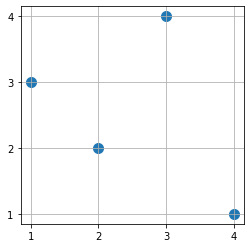

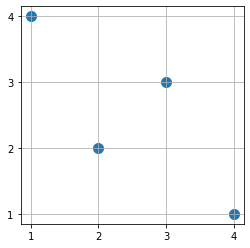

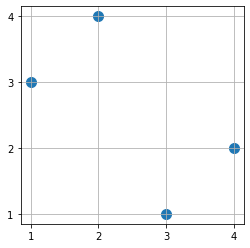

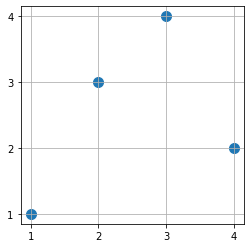

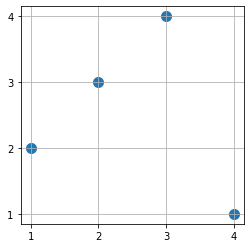

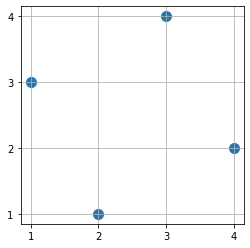

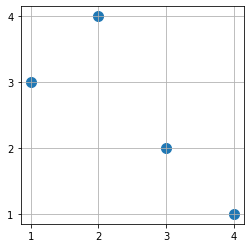

In [ ]:
plotPermutations(conjure_solutions)

## Boxed Mesh avoidance
We say that a permutation $\pi$ avoids a boxed mesh pattern $(\sigma,R)$ if $\pi$ classically avoids $\sigma$ or for each occurence of $\sigma$ in $\pi$ one or more of the other box mesh pattern constraints are violated.

For example the boxed pattern $231$ is avoided by the permutation $465123$.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4
boxed_avoidance = [ [2,3,1] ]


In [ ]:
%%conjure --number-of-solutions=all --solver=minion

language Essence 1.3

$ This of mesh patterns to avoid
given boxed_avoidance : set of sequence(injective) of int

$ The permutation we are searching for (1..length is the permutation)
given length : int
find perm : sequence (size length, injective) of int(1..length)


$ creating a padded version of perm, where position 0 contains the value 0 and position length+1 contains the value length+1
$ this is only used for mesh avoidance/containment
find permPadded : matrix indexed by [int(0..length+1)] of int(0..length+1)
such that permPadded[0] = 0, permPadded[length+1] = length+1
such that forAll i : int(1..length) . perm(i) = permPadded[i]

such that
    $ av is the pattern, mesh is the mesh as a relation
    forAll av in boxed_avoidance .
    $ Build the inverse of 'av'. This is completely evaluated before solving.
    exists avinv: matrix indexed by [int(0..|av|+1)] of int(0..|av|+1),
                avinv[0] = 0 /\ avinv[|av|+1] = |av|+1 /\
                (forAll i: int(1..|av|) . avinv[av(i)] = i).
        $ Look for all places where the pattern can occur
        forAll ix : matrix indexed by [int(0..|av|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|av|+1]=length+1
                , forAll i : int(0..|av|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|av|) , n1 < n2 .
                    av(n1) < av(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ]) .
            (
                $ If we find the pattern, make sure there is at least one value in some cell of the mesh
                exists i : int(1..|av|) .
                exists j : int(1..|av|) .
                    exists z: int(ix[i]+1..ix[i+1]-1). (permPadded[ix[avinv[j]]] <= permPadded[z] /\ permPadded[z] <= permPadded[ix[avinv[j+1]]])
            )




{'conjure_solutions': [{'perm': [2, 3, 1, 4],
   'permPadded': {'0': 0, '1': 2, '2': 3, '3': 1, '4': 4, '5': 5}},
  {'perm': [3, 2, 1, 4],
   'permPadded': {'0': 0, '1': 3, '2': 2, '3': 1, '4': 4, '5': 5}},
  {'perm': [1, 2, 3, 4],
   'permPadded': {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}},
  {'perm': [4, 3, 2, 1],
   'permPadded': {'0': 0, '1': 4, '2': 3, '3': 2, '4': 1, '5': 5}},
  {'perm': [1, 3, 2, 4],
   'permPadded': {'0': 0, '1': 1, '2': 3, '3': 2, '4': 4, '5': 5}},
  {'perm': [2, 4, 1, 3],
   'permPadded': {'0': 0, '1': 2, '2': 4, '3': 1, '4': 3, '5': 5}},
  {'perm': [4, 2, 1, 3],
   'permPadded': {'0': 0, '1': 4, '2': 2, '3': 1, '4': 3, '5': 5}},
  {'perm': [1, 2, 4, 3],
   'permPadded': {'0': 0, '1': 1, '2': 2, '3': 4, '4': 3, '5': 5}},
  {'perm': [2, 1, 3, 4],
   'permPadded': {'0': 0, '1': 2, '2': 1, '3': 3, '4': 4, '5': 5}},
  {'perm': [1, 4, 3, 2],
   'permPadded': {'0': 0, '1': 1, '2': 4, '3': 3, '4': 2, '5': 5}},
  {'perm': [2, 4, 3, 1],
   'permPadded': {'0': 0

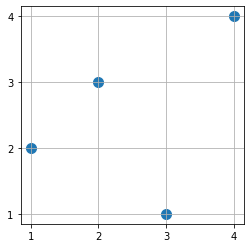

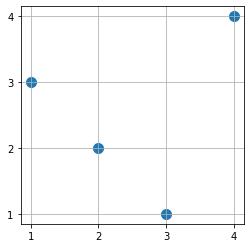

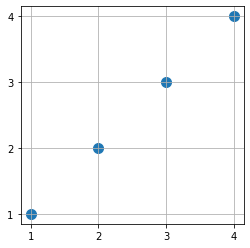

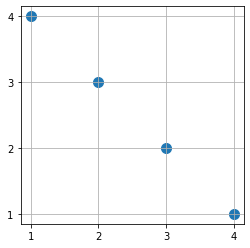

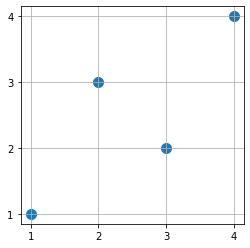

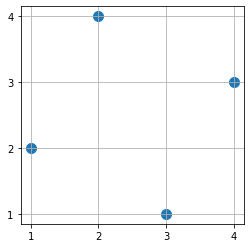

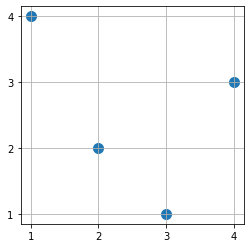

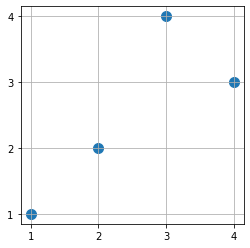

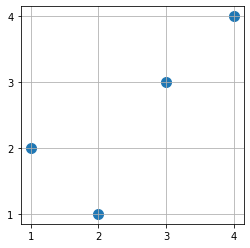

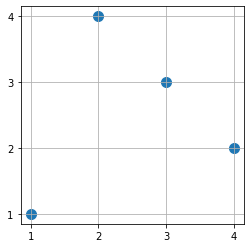

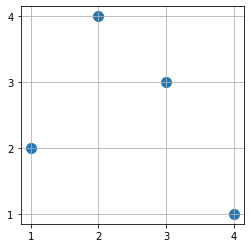

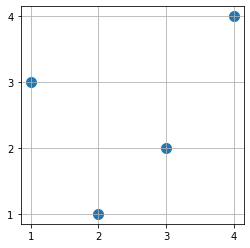

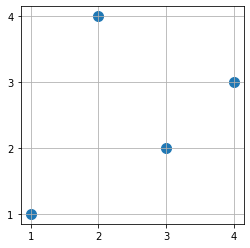

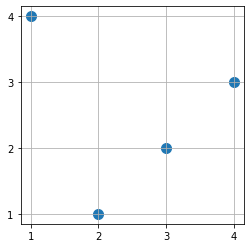

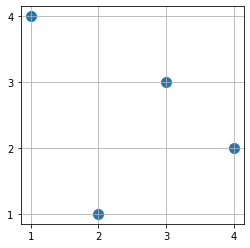

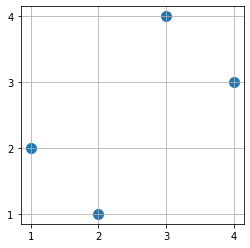

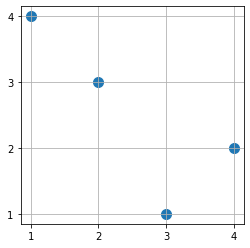

In [ ]:
plotPermutations(conjure_solutions)

## Consecutive containment

Consecutive patterns are a special case of vincular patterns, namely those where *all* entries are underlined. In an occurrence of a consecutive pattern it is thus necessary that *all* entries are adjacent. Finding an occurrence of a consecutive pattern therefore consists in finding a contiguous subsequence of $\pi$ that is order-isomorphic to the pattern $\sigma$.

For example, the consecutive pattern $\underline{312}$ can be found inside $152463$ as the subsequence $525$.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4
consecutive_containment = [ [3,1,2] ]

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given consecutive_containment : set of sequence (injective) of int

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll pattern in consecutive_containment .
        exists ix : matrix indexed by [int(1..|pattern|)] of int(1..length)
        
            , (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            $ n1 and n2 are indices
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                (pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2]))
            )

            .

            (forAll bar : int(1..|pattern|-1) . ix[bar] + 1 = ix[bar+1])



{'conjure_solutions': [{'perm': [1, 4, 2, 3]},
  {'perm': [4, 2, 3, 1]},
  {'perm': [2, 4, 1, 3]},
  {'perm': [4, 3, 1, 2]},
  {'perm': [3, 4, 1, 2]},
  {'perm': [4, 1, 2, 3]},
  {'perm': [3, 1, 2, 4]},
  {'perm': [4, 1, 3, 2]}]}

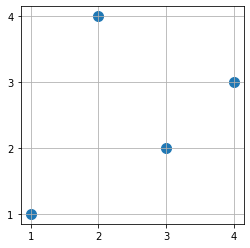

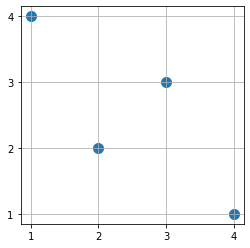

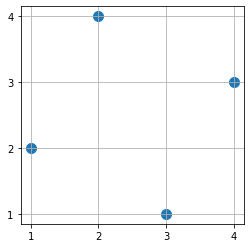

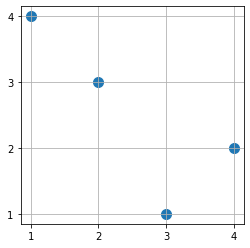

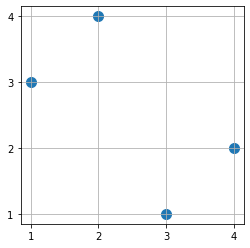

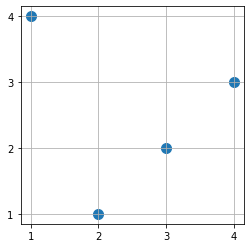

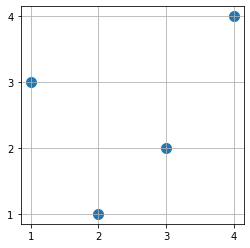

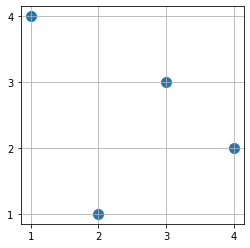

In [ ]:
plotPermutations(conjure_solutions)

## Consecutive avoidance

A permutation $\pi$ avoids a consecutive pattern $\sigma$ if it either classically avoids $\sigma$ or for all occurences of $\sigma$ in $\pi$ none are a contiguious subsequence of $\pi$.

For example, the permutation $416325$ avoids the consecutive pattern $\underline{312}$.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4
consecutive_avoidance = [ [3,1,2] ]

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given consecutive_avoidance : set of sequence (injective) of int

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll pattern in consecutive_avoidance .
        forAll ix : matrix indexed by [int(1..|pattern|)] of int(1..length)
        
            , (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            $ n1 and n2 are indices
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                (pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2]))
            )

            .

            !(forAll bar : int(1..|pattern|-1) . ix[bar] + 1 = ix[bar+1])


{'conjure_solutions': [{'perm': [2, 3, 4, 1]},
  {'perm': [2, 1, 4, 3]},
  {'perm': [3, 1, 4, 2]},
  {'perm': [4, 3, 2, 1]},
  {'perm': [1, 3, 4, 2]},
  {'perm': [3, 4, 2, 1]},
  {'perm': [1, 2, 4, 3]},
  {'perm': [3, 2, 4, 1]},
  {'perm': [2, 4, 3, 1]},
  {'perm': [2, 3, 1, 4]},
  {'perm': [2, 1, 3, 4]},
  {'perm': [3, 2, 1, 4]},
  {'perm': [1, 4, 3, 2]},
  {'perm': [1, 3, 2, 4]},
  {'perm': [1, 2, 3, 4]},
  {'perm': [4, 2, 1, 3]}]}

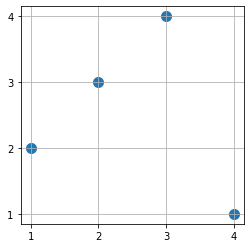

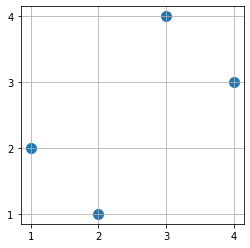

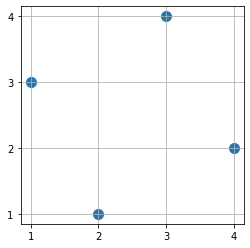

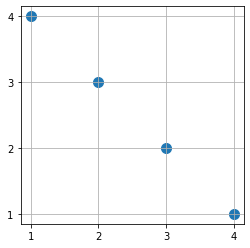

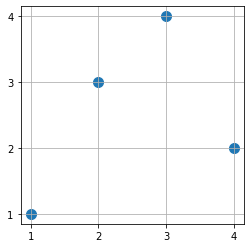

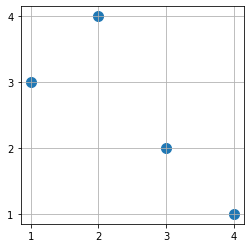

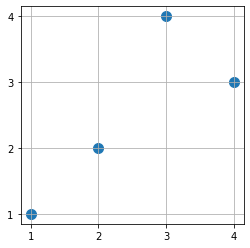

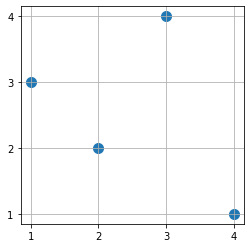

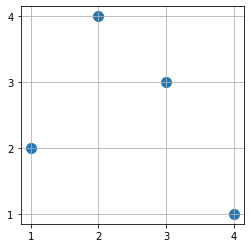

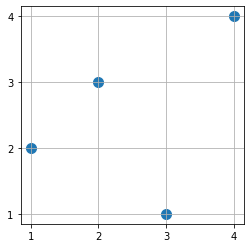

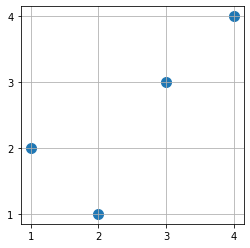

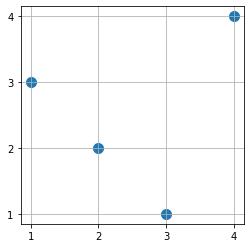

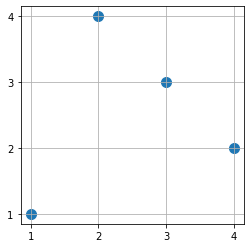

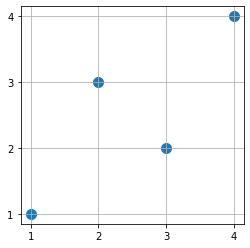

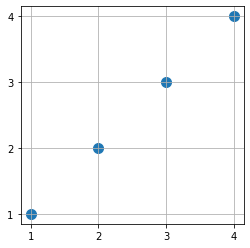

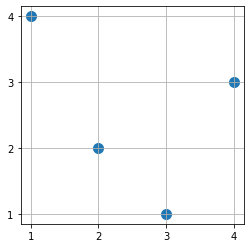

In [ ]:
plotPermutations(conjure_solutions)

# Permutation properties

We have 6 permutation properties.


## Simple permutation

An *interval* of a permutation $\pi$ corresponds to a set of contiguous indices $I = [a, b]$ such that the set of values $\pi(I) = \{\pi(i) : i \in I\}$ is also contiguous. 
Every permutation of length $n$ has intervals of lengths 0, 1 and $n$. 
If a permutation $\pi$ has no other intervals, then $\pi$ is said to be *simple*.

For example the permutation $251364$ is simple, but the permutation $635241$ is not as $63524$ or $3524$ are intervals (amongst others).

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4

In [ ]:
%%conjure --solver=minion

language Essence 1.3

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ Simple permutations do not contain intervals.
$ An interval is a set of contiguous indices such that the values are also contiguous.

$ perm is a simple permutation
such that
    [ max(subperm) - min(subperm) + 1 != |subperm|          $ the values are not contiguous
    | i : int(1..length)                                    $ start index of the sub perm
    , j : int(1..length)                                    $ end index of the sub perm
    , i < j                                                 $ start comes before end
    , (i,j) != (1,length)                                   $ it's not the full permutation
    , letting subperm be [perm(k) | k : int(i..j)]          $ give the sub perm a name
    ]


{'perm': [2, 4, 1, 3]}

## Block-wise simple (no definition)

Is another property that Ruth will write about. 
This is the one we are waiting for the OK of Eli.


In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

language Essence 1.3

given length : int
find perm : sequence (size length, injective) of int(1..length)

such that
    [ and([ max([ perm(i) | i : int(start..middle) ]) > min([ perm(i) | i : int(middle+1..end) ])
          , min([ perm(i) | i : int(start..middle) ]) < max([ perm(i) | i : int(middle+1..end) ])
          $ , forAll i : int(1..start-1) . perm(i) < minSE \/ perm(i) > maxSE
          $ , forAll i : int(end+1..length) . perm(i) < minSE \/ perm(i) > maxSE
          ])
    | start, middle, end : int(1..length)
    , start <= middle
    , middle < end
    , letting minSE be min([ perm(i) | i : int(start..end) ])
    , letting maxSE be max([ perm(i) | i : int(start..end) ])
    , maxSE - minSE = end - start
    ]

{'conjure_solutions': [{'perm': [2, 4, 1, 3]}, {'perm': [3, 1, 4, 2]}]}

## Plus-decomposable

Given a permutation $\sigma=\sigma(1)\ldots\sigma(m)$ of length $m$ and non-empty permutations $\alpha_{1},\ldots,\alpha_{m}$ the *inflation* of $\sigma$ by $\alpha_{1},\ldots,\alpha_{m}$, written as $\sigma[\alpha_{1},\ldots,\alpha_{m}]$, is the unique permutation obtained by replacing each entry $\sigma(i)$ by an interval that is order isomorphic to $\alpha_{i}$, where the relative ordering of the intervals corresponds to the ordering of the entries of $\sigma$. Conversely, a *block-decomposition* or *deflation* of a permutation $\pi$ is any expression of $\pi$ written as an inflation $\pi=\sigma[\alpha_{1},\ldots,\alpha_{m}]$.

A permutation $\pi$ is *plus-decomposable* if it has a deflation of the form $\pi = 12 [\alpha_1,\alpha_2]$ for non-empty permutations $\alpha_1$ and $\alpha_2$. 

For example $213654$ is a plus-decomposable permutation.
But $546123$ (which is minus-decomposable) or $236145$ (which is not simple) are not.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

language Essence 1.3

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ perm is plus-decomposable
such that
    exists sep : int(1..length-1) .
        max([ perm(i) | i : int(1..sep) ]) < min([ perm(i) | i : int(sep+1..length) ])


{'conjure_solutions': [{'perm': [1, 4, 2, 3]},
  {'perm': [1, 3, 4, 2]},
  {'perm': [1, 3, 2, 4]},
  {'perm': [2, 3, 1, 4]},
  {'perm': [3, 2, 1, 4]},
  {'perm': [2, 1, 4, 3]},
  {'perm': [3, 1, 2, 4]},
  {'perm': [2, 1, 3, 4]},
  {'perm': [1, 4, 3, 2]},
  {'perm': [1, 2, 4, 3]},
  {'perm': [1, 2, 3, 4]}]}

## Minus-decomposable

A permutation $\pi$ is *minus-decomposable* if it has a deflation of the form $\pi = 21 [\alpha_1,\alpha_2]$ for non-empty permutations $\alpha_1$ and $\alpha_2$.

For example $546123$ is a minus-decomposable permutation.
But $213654$ (which is plus-decomposable) or $236145$ (which is not simple) are not.



In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

language Essence 1.3

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ perm is minus-decomposable
such that
    exists sep : int(1..length-1) .
        min([ perm(i) | i : int(1..sep) ]) > max([ perm(i) | i : int(sep+1..length) ])


{'conjure_solutions': [{'perm': [3, 4, 1, 2]},
  {'perm': [4, 2, 3, 1]},
  {'perm': [4, 1, 3, 2]},
  {'perm': [3, 2, 4, 1]},
  {'perm': [4, 2, 1, 3]},
  {'perm': [3, 4, 2, 1]},
  {'perm': [4, 3, 2, 1]},
  {'perm': [4, 3, 1, 2]},
  {'perm': [2, 3, 4, 1]},
  {'perm': [4, 1, 2, 3]},
  {'perm': [2, 4, 3, 1]}]}

## Involution

A permutation $\pi\in S_n$ is called an *involution*, if $\pi=\pi^{-1}$.

A permutation is an involution precisely if and only if it can be written as a finite product of disjoint transpositions.

$1243=(12)(43)$ is an involution but $2431=(124)(3)=(12)(24)(41)(3)$ is not.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

language Essence 1.3

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ perm is an involution
$ perm * perm = id
such that
    forAll i : int(1..length) .
        perm(perm(i)) = i


{'conjure_solutions': [{'perm': [1, 2, 3, 4]},
  {'perm': [3, 4, 1, 2]},
  {'perm': [2, 1, 4, 3]},
  {'perm': [1, 3, 2, 4]},
  {'perm': [1, 4, 3, 2]},
  {'perm': [4, 3, 2, 1]},
  {'perm': [1, 2, 4, 3]},
  {'perm': [3, 2, 1, 4]},
  {'perm': [4, 2, 3, 1]},
  {'perm': [2, 1, 3, 4]}]}

In [ ]:
# testing

for sol in conjure_solutions:
    perm = sol["perm"]
    for i in range(1, length+1):
        iVal = perm[i-1] # applied once
        iValVal = perm[iVal-1] # applied twice
        if i != iValVal:
            print("Not an involution:", perm)
            break


## Derangement


A *derangement* is a permutation with no fixed point. Which means that in each index the value of the element is not equal to the index value, so $\pi(i)\neq i$.

$4312$ is a derangement whereas $1234$ is not.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

language Essence 1.3

given length : int
find perm : sequence (size length, injective) of int(1..length)

such that
    forAll i : int(1..length) .
        perm(i) != i


{'conjure_solutions': [{'perm': [3, 4, 2, 1]},
  {'perm': [4, 3, 2, 1]},
  {'perm': [3, 4, 1, 2]},
  {'perm': [4, 1, 2, 3]},
  {'perm': [2, 4, 1, 3]},
  {'perm': [2, 1, 4, 3]},
  {'perm': [4, 3, 1, 2]},
  {'perm': [2, 3, 4, 1]},
  {'perm': [3, 1, 4, 2]}]}

In [ ]:
# testing

for sol in conjure_solutions:
    perm = sol["perm"]
    for i in range(1, length+1):
        iVal = perm[i-1] # applied once
        if i == iVal:
            print("Not a derangement:", perm)
            break


## Non-derangement

A *nonderangement* is a permutation with at least one fixed
point. i.e. there is at least one $i$ such that $\pi(i)=i$.

$2431$ is a non-derangement whereas $4321$ is not.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 4

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

language Essence 1.3

given length : int
find perm : sequence (size length, injective) of int(1..length)

such that
    exists i : int(1..length) .
        perm(i) = i


{'conjure_solutions': [{'perm': [1, 4, 3, 2]},
  {'perm': [3, 1, 2, 4]},
  {'perm': [1, 3, 4, 2]},
  {'perm': [1, 4, 2, 3]},
  {'perm': [4, 1, 3, 2]},
  {'perm': [4, 2, 3, 1]},
  {'perm': [1, 2, 3, 4]},
  {'perm': [1, 3, 2, 4]},
  {'perm': [3, 2, 4, 1]},
  {'perm': [4, 2, 1, 3]},
  {'perm': [2, 4, 3, 1]},
  {'perm': [1, 2, 4, 3]},
  {'perm': [3, 2, 1, 4]},
  {'perm': [2, 3, 1, 4]},
  {'perm': [2, 1, 3, 4]}]}

In [ ]:
# testing

for sol in conjure_solutions:
    perm = sol["perm"]
    if any([i == perm[i-1] for i in range(1, length+1)]):
        # it is a non-derangement
        pass
    else:
        print("Not a non-derangement:", perm)
    # for :
    #     iVal = perm[i-1] # applied once
    #     if i == iVal:
    #         non_derangement = True
            
    #         break


# Permutation statistics

We support 5 different statistics in permutations.


## Number of inversions

An *inversion* in a permutation is a pair of numbers such that the larger number appears to the left of the smaller one in the permutation.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 3

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the inversion count
find inversionCount : int(0..length**2) $ upper bound is not tight
such that
    inversionCount =
        sum([ 1
            | i,j : int(1..length)
            , i < j
            , perm(i) > perm(j)
            ])


{'conjure_solutions': [{'inversionCount': 1, 'perm': [2, 1, 3]},
  {'inversionCount': 0, 'perm': [1, 2, 3]},
  {'inversionCount': 2, 'perm': [3, 1, 2]},
  {'inversionCount': 1, 'perm': [1, 3, 2]},
  {'inversionCount': 3, 'perm': [3, 2, 1]},
  {'inversionCount': 2, 'perm': [2, 3, 1]}]}

## Number of descents

des$(\sigma) = |\{i : \sigma(i) > \sigma(i + 1)\}|$

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 3

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the inversion count
find descentCount : int(0..length)
such that
    descentCount =
        sum([ 1
            | i : int(1..length-1)
            , perm(i) > perm(i+1)
            ])


{'conjure_solutions': [{'descentCount': 1, 'perm': [2, 3, 1]},
  {'descentCount': 1, 'perm': [1, 3, 2]},
  {'descentCount': 0, 'perm': [1, 2, 3]},
  {'descentCount': 1, 'perm': [3, 1, 2]},
  {'descentCount': 1, 'perm': [2, 1, 3]},
  {'descentCount': 2, 'perm': [3, 2, 1]}]}

## Number of ascents

asc$(\sigma) = |\{i : \sigma(i) < \sigma(i + 1)\}|$

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 3

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the inversion count
find ascentCount : int(0..length)
such that
    ascentCount =
        sum([ 1
            | i : int(1..length-1)
            , perm(i) < perm(i+1)
            ])


{'conjure_solutions': [{'ascentCount': 2, 'perm': [1, 2, 3]},
  {'ascentCount': 0, 'perm': [3, 2, 1]},
  {'ascentCount': 1, 'perm': [1, 3, 2]},
  {'ascentCount': 1, 'perm': [2, 3, 1]},
  {'ascentCount': 1, 'perm': [3, 1, 2]},
  {'ascentCount': 1, 'perm': [2, 1, 3]}]}

## Number of excedances

exc$(\sigma) = |\{i : \sigma(i) > i\}|$

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 3

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the inversion count
find excedanceCount : int(0..length)
such that
    excedanceCount =
        sum([ 1
            | i : int(1..length)
            , perm(i) > i
            ])


{'conjure_solutions': [{'excedanceCount': 1, 'perm': [1, 3, 2]},
  {'excedanceCount': 2, 'perm': [2, 3, 1]},
  {'excedanceCount': 1, 'perm': [3, 1, 2]},
  {'excedanceCount': 0, 'perm': [1, 2, 3]},
  {'excedanceCount': 1, 'perm': [2, 1, 3]},
  {'excedanceCount': 1, 'perm': [3, 2, 1]}]}

## Major Index
The sum of the positions of the descents.

maj$(\sigma) = \sum_{\sigma(i)>\sigma(i+1)} i$

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 3

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
find perm : sequence (size length, injective) of int(1..length)

$ the inversion count
find majorIndex : int(0..length**2)
such that
    majorIndex =
        sum([ i
            | i : int(1..length-1)
            , perm(i) > perm(i+1)
            ])


{'conjure_solutions': [{'majorIndex': 2, 'perm': [1, 3, 2]},
  {'majorIndex': 1, 'perm': [2, 1, 3]},
  {'majorIndex': 0, 'perm': [1, 2, 3]},
  {'majorIndex': 3, 'perm': [3, 2, 1]},
  {'majorIndex': 2, 'perm': [2, 3, 1]},
  {'majorIndex': 1, 'perm': [3, 1, 2]}]}

# Examples

## Contains vincularly, avoids bivincularly, non-derangement, plus-decomposable, with 7 inversions

Let us look for all permutations of length 6 which avoid the bivincular pattern $\underline{23}1$, contain the vincular pattern $\underline{23}1$, are a non-derangement, are plus-decomposable and have an inversion count of 7.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
length = 6
vincular_containment = [ [ [2,3,1]
                         , [1]
                         ]
                       ]
bivincular_avoidance = [ [ [2,3,1]
                         , [1]
                         ]
                       ]

In [ ]:
%%conjure --number-of-solutions=all --solver=minion

given length : int
given vincular_containment : set of (sequence (injective) of int, set of int)

find perm : sequence (size length, injective) of int(1..length)

such that
    forAll (pattern, bars) in vincular_containment .
        exists ix : matrix indexed by [int(1..|pattern|)] of int(1..length)
        
            , (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            $ n1 and n2 are indices
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                (pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2]))
            )

            .

            (forAll bar in bars . ix[bar] + 1 = ix[bar+1])

            $ for bivincular, we need:
            $ /\
            $ (forAll bar in bars . perm(ix[bar]) + 1 = perm(ix[bar+1])




given bivincular_avoidance : set of (sequence (injective) of int, set of int)

such that
    forAll (pattern, bars) in bivincular_avoidance .
        forAll ix : matrix indexed by [int(1..|pattern|)] of int(1..length)
        
            , (forAll i,j : int(1..|pattern|) . i < j -> ix[i] < ix[j]) /\
            $ n1 and n2 are indices
            (forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                (pattern(n1) < pattern(n2) <-> perm(ix[n1]) < perm(ix[n2]))
            )

            .

            !(  (forAll bar in bars . ix[bar] + 1 = ix[bar+1])
                /\
                (forAll bar in bars . perm(ix[bar]) + 1 = perm(ix[bar+1]))
            )



$ non-derangement
such that
    exists i : int(1..length) .
        perm(i) = i


$ perm is plus-decomposable
such that
    exists sep : int(1..length-1) .
        max([ perm(i) | i : int(1..sep) ]) < min([ perm(i) | i : int(sep+1..length) ])


$ the inversion count
find inversionCount : int(0..length**2) $ upper bound is not tight
such that
    inversionCount =
        sum([ 1
            | i,j : int(1..length)
            , i < j
            , perm(i) > perm(j)
            ])

such that inversionCount = 7


{'conjure_solutions': [{'inversionCount': 7, 'perm': [4, 3, 5, 1, 2, 6]},
  {'inversionCount': 7, 'perm': [1, 5, 4, 3, 6, 2]},
  {'inversionCount': 7, 'perm': [1, 4, 6, 3, 5, 2]},
  {'inversionCount': 7, 'perm': [1, 5, 4, 6, 2, 3]},
  {'inversionCount': 7, 'perm': [4, 2, 5, 3, 1, 6]},
  {'inversionCount': 7, 'perm': [1, 5, 3, 6, 4, 2]},
  {'inversionCount': 7, 'perm': [3, 5, 4, 1, 2, 6]},
  {'inversionCount': 7, 'perm': [5, 2, 4, 1, 3, 6]},
  {'inversionCount': 7, 'perm': [1, 4, 6, 5, 2, 3]},
  {'inversionCount': 7, 'perm': [3, 5, 2, 4, 1, 6]},
  {'inversionCount': 7, 'perm': [2, 5, 4, 3, 1, 6]},
  {'inversionCount': 7, 'perm': [1, 3, 6, 5, 4, 2]},
  {'inversionCount': 7, 'perm': [4, 3, 2, 5, 1, 6]},
  {'inversionCount': 7, 'perm': [1, 6, 3, 5, 2, 4]}]}

In [ ]:
print(len(conjure_solutions))

for sol in conjure_solutions:
    perm = sol["perm"]
    if perm == [1,3,6,5,4,2]:
        print("Yes")

14
Yes
